# PCA, Grupowanie
## PCA - Przykład

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns

In [2]:
df = pd.read_csv("wdbc.data")
X = scale(df.drop(columns="diagnosis")) # Dane należy standaryzować
y = df.diagnosis

In [3]:
pca = PCA()
X_pc = pca.fit_transform(X)

In [4]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Text(0, 0.5, 'Explained variance ratio')

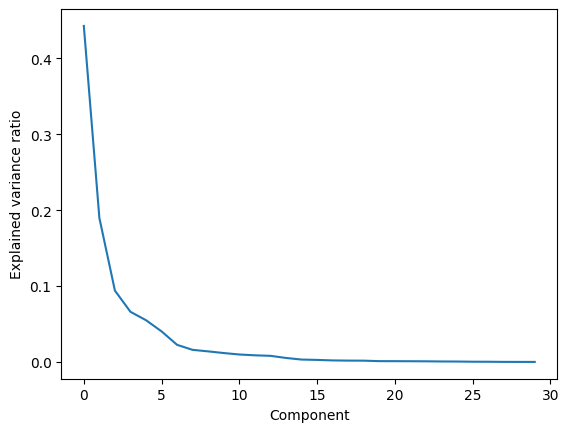

In [5]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")

In [6]:
pca = PCA(n_components=5)
X_pc = pca.fit_transform(X)

<Axes: >

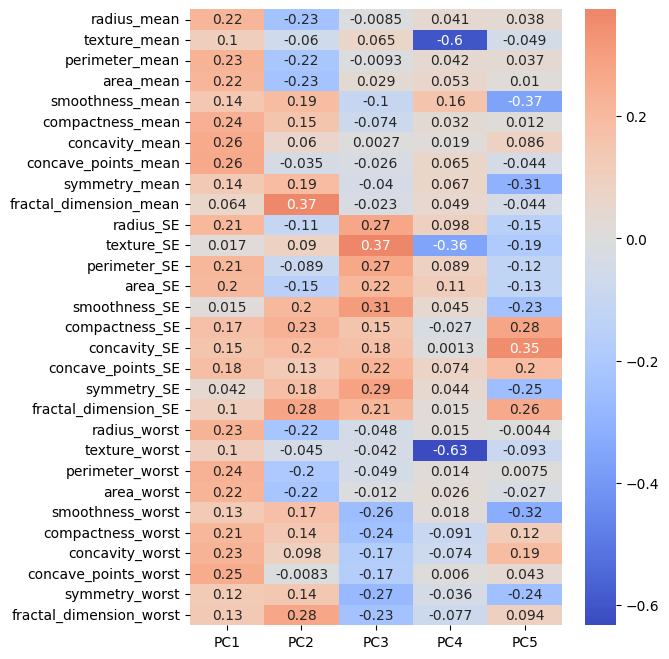

In [7]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df.columns[1:])
plt.figure(figsize=(6,8))
sns.heatmap(loadings, annot=True, center=0.0, cmap='coolwarm')

Text(0, 0.5, 'PC2')

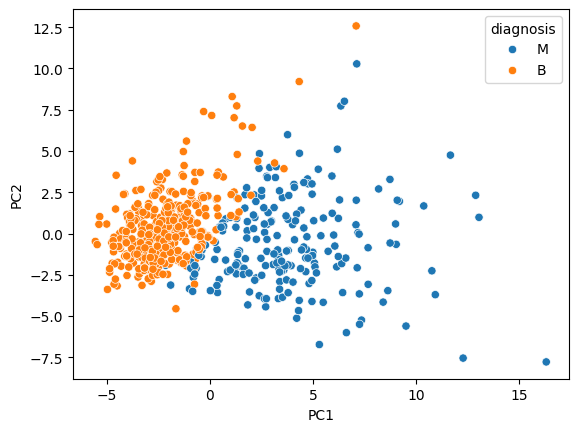

In [8]:
sns.scatterplot(x=X_pc[:, 0], y=X_pc[:, 1], hue=y)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [9]:
lm = LogisticRegression()
cv = pd.DataFrame(cross_validate(lm, X_pc, y))
cv.mean()

fit_time      0.002200
score_time    0.000600
test_score    0.971914
dtype: float64

## Zadania
1. Zbiór MNIST zawiera obrazy odręcznie napisanych cyfr. Każda z 784 kolumn odpowiada jednemu pikselowi obrazu. Użyj PCA do redukcji wymiarowości zbioru i stwórz model klasyfikujący cyfry. Zbiór można wczytać w następujący sposób:

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", parser="auto")
X = mnist.data
y = mnist.target
X = scale(X)

In [11]:
pca = PCA()
X_pc = pca.fit_transform(X)

Text(0, 0.5, 'Explained variance ratio')

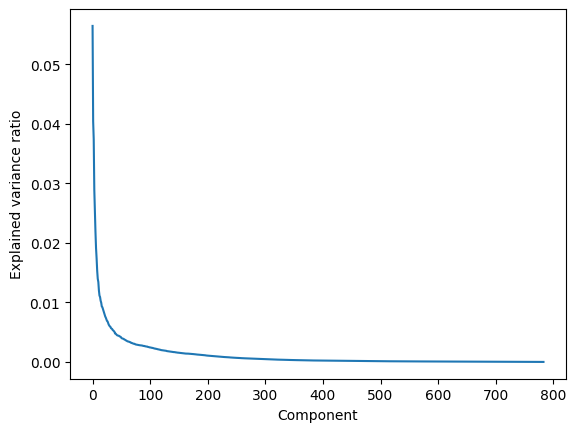

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")

Text(0, 0.5, 'Explained variance ratio')

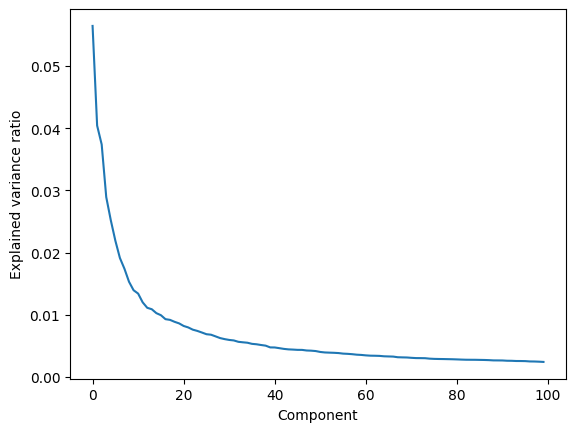

In [13]:
plt.plot(pca.explained_variance_ratio_[0:100])
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")


In [14]:
pca = PCA(n_components=30)
X_pc = pca.fit_transform(X)

Text(0, 0.5, 'PC2')

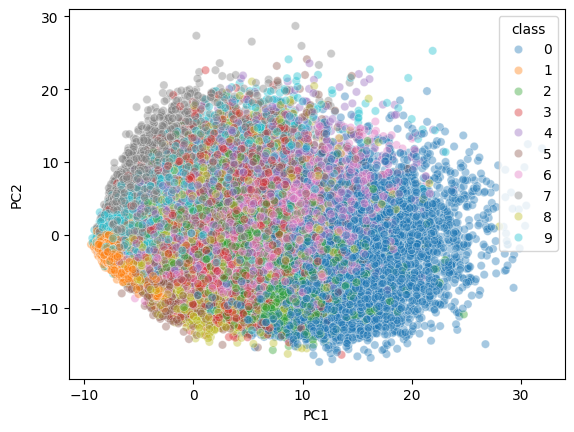

In [15]:
sns.scatterplot(x=X_pc[:, 0], y=X_pc[:, 1], hue=y, alpha = 0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [16]:
# lm = LogisticRegression(solver='liblinear')
# cv = pd.DataFrame(cross_validate(lm, X_pc, y, cv=3))
# cv.mean()

2. Wczytaj zbiór w `housing.csv`. Usuń wiersze zawierające brakujące wartości. Koduj zmienne kategoryczne metodą `get_dummies()`. Skaluj dane.
    - Użyj [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) do grupowania zbioru.
    - Stwórz wykres zależności WCSS (atrybut `inertia_`) od `n_clusters`. Na podstawie wykresu wybierz odpowiednią liczbę grup.
    - Wizualizuj dane po grupowaniu. Stwórz na przykład wykres punktowy `latitude`/`longitude`, gdzie kolor reprezentuje indeks grupy (dostępny w atrybucie `labels_`) oraz wybrane inne wykresy.
    - Grupuj zbiór przy pomocy [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Liczbę grup można regulować parametrem `n_clusters` lub `distance_threshold`. Porównaj wizualnie grupowania stworzone przez k-means i grupowanie aglomeracyjne.


In [17]:
df = pd.read_csv('housing.csv')
X = scale(pd.get_dummies(df).dropna())


In [18]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    X_means = kmeans.fit(X)
    inertia.append(X_means.inertia_)
inertia

[286062.0,
 242584.89349806515,
 209926.73666221756,
 172121.61991120363,
 147217.8145689949,
 138220.02395508776,
 128354.85394075574,
 121401.3613001009,
 99796.78787346915,
 91680.08622902981]

In [19]:
len(df.ocean_proximity.unique())

5

Text(0, 0.5, 'Inertia')

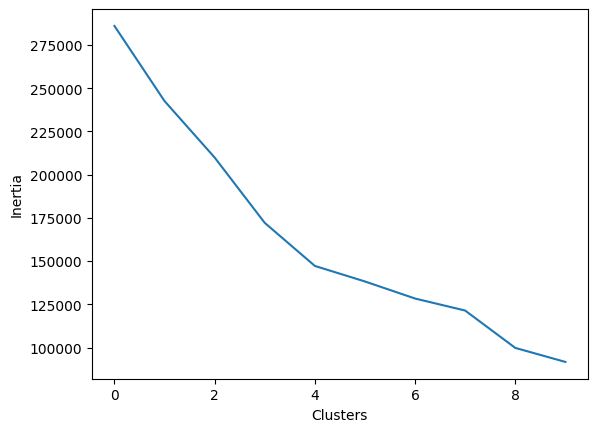

In [20]:
plt.plot(inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")

- Wizualizuj dane po grupowaniu. Stwórz na przykład wykres punktowy `latitude`/`longitude`, gdzie kolor reprezentuje indeks grupy (dostępny w atrybucie `labels_`) oraz wybrane inne wykresy.

In [21]:
kmeans = KMeans(n_clusters=5, n_init="auto")
X_means = kmeans.fit(X)

Text(0, 0.5, 'longitude')

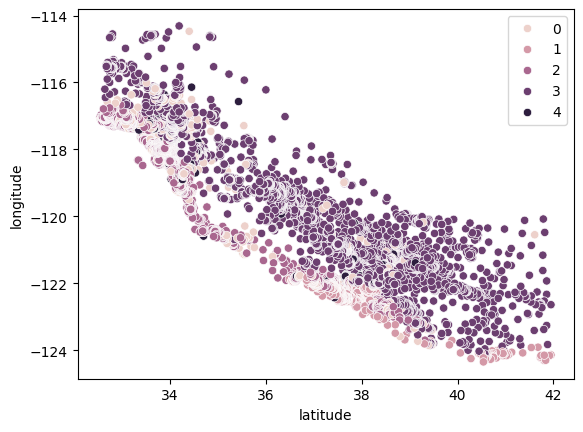

In [22]:
df = df.dropna()
sns.scatterplot(x=df.latitude, y=df.longitude, hue=X_means.labels_)
plt.xlabel("latitude")
plt.ylabel("longitude")

Text(0, 0.5, 'population')

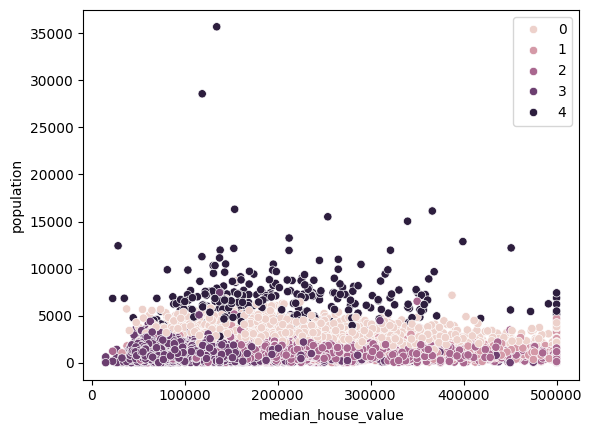

In [23]:
sns.scatterplot(x=df.median_house_value, y=df.population, hue=X_means.labels_)
plt.xlabel("median_house_value")
plt.ylabel("population")

Text(0, 0.5, 'households')

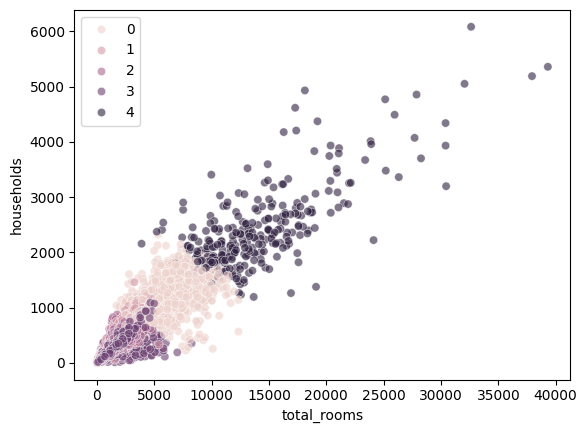

In [34]:
sns.scatterplot(x=df.total_rooms, y=df.households, hue=X_means.labels_, alpha=0.6)
plt.xlabel("total_rooms")
plt.ylabel("households")

Grupuj zbiór przy pomocy [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Liczbę grup można regulować parametrem `n_clusters` lub `distance_threshold`. Porównaj wizualnie grupowania stworzone przez k-means i grupowanie aglomeracyjne

In [28]:
from sklearn.cluster import AgglomerativeClustering
clustering  = AgglomerativeClustering(n_clusters=5)
labels = clustering.fit_predict(X)

Text(0, 0.5, 'longitude')

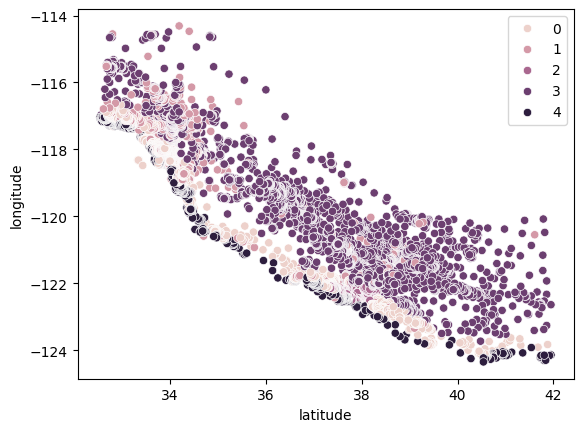

In [29]:
df = df.dropna()
sns.scatterplot(x=df.latitude, y=df.longitude, hue=labels)
plt.xlabel("latitude")
plt.ylabel("longitude");

Text(0, 0.5, 'population')

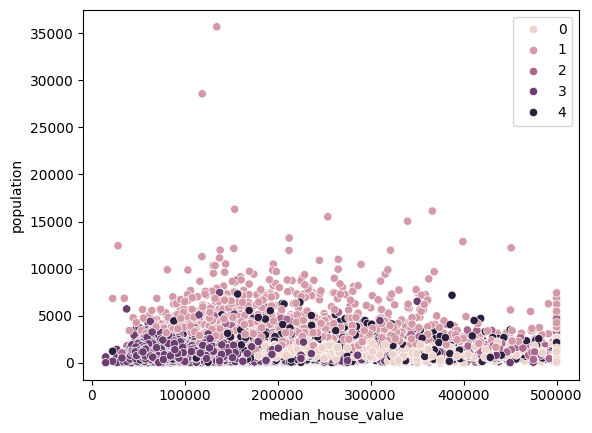

In [31]:
sns.scatterplot(x=df.median_house_value, y=df.population, hue=labels)
plt.xlabel("median_house_value")
plt.ylabel("population");

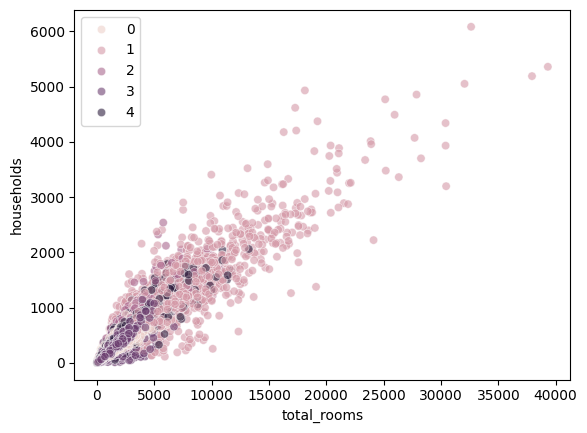

In [35]:
sns.scatterplot(x=df.total_rooms, y=df.households, hue=labels, alpha=0.6)
plt.xlabel("total_rooms")
plt.ylabel("households");